In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


## Reading file into dataframe

In [20]:
df = pd.read_csv('noshowappointments.csv', encoding='utf-8', dtype='unicode')


## Data Wrangling
The dataframe is cleaned to support analysis. The columns PatientID , AppointmentID and AppointmentDay are dropped as they do not help in the analysis. The columns  Age , Scholarship , Hipertension ,Diabetes	, Alcoholism, Handcap	and SMS_received are converted to integer type to allow statistical computations.

In [21]:


data_a = df.drop(['AppointmentID', 'AppointmentDay'], axis=1)
data = data_a.drop(data_a.columns[0], axis=1)

data['Hipertension'] = data['Hipertension'].astype(str).astype(int)

data['Diabetes'] = data['Diabetes'].astype(str).astype(int)

data['Alcoholism'] = data['Alcoholism'].astype(str).astype(int)

data['Scholarship'] = data['Scholarship'].astype(str).astype(int)

data['Handcap'] = data['Handcap'].astype(str).astype(int)

data['SMS_received'] = data['Handcap'].astype(str).astype(int)

data['Age'] = data['Age'].astype(str).astype(int)

data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65498 entries, 0 to 65497
Data columns (total 11 columns):
Gender           65498 non-null object
ScheduledDay     65498 non-null object
Age              65498 non-null int64
Neighbourhood    65498 non-null object
Scholarship      65498 non-null int64
Hipertension     65498 non-null int64
Diabetes         65498 non-null int64
Alcoholism       65498 non-null int64
Handcap          65498 non-null int64
SMS_received     65498 non-null int64
No-show          65498 non-null object
dtypes: int64(7), object(4)
memory usage: 5.5+ MB


Gender           0
ScheduledDay     0
Age              0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
SMS_received     0
No-show          0
dtype: int64

In [22]:
data.nunique()

Gender               2
ScheduledDay     62318
Age                101
Neighbourhood       80
Scholarship          2
Hipertension         2
Diabetes             2
Alcoholism           2
Handcap              4
SMS_received         4
No-show              2
dtype: int64

In [23]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [24]:
data['ScheduledDay'].unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-03-17T10:02:49Z',
       '2016-03-28T15:29:57Z', '2016-05-20T14:59:17Z'], dtype=object)

In [25]:
data['Scholarship'].unique()

array([0, 1])

In [26]:
data['Hipertension'].unique()

array([1, 0])

In [27]:
data['Diabetes'].unique()

array([0, 1])

In [28]:
data['Alcoholism'].unique()

array([0, 1])

In [29]:
data['Handcap'].unique()

array([0, 1, 2, 3])

In [30]:
data['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
data['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115])

In [32]:
data = data.drop(data.index[data.Age == 0])

In [33]:
data['Age'].nunique()

100

In [34]:
data['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   3,   1,  69,  68,  60,  67,  36,  10,  35,
        20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,  24,
        66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,  14,
         9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,  86,
        91,  98,  92,  96,  93,  95,  97, 102, 115])

The row with age zero has been dropped .

In [35]:
data['SMS_received'].unique()

array([0, 1, 2, 3])

There are four unique values for SMS_received . It is not exactly known what the four values encode for and may represent different types of messages . Hence it cannot be conclusively said that the column SMS_received has erroneous values.

The data does not contain any null or missing values. Only age column contained a value of zero which cannot be true and hence that row has been dropped.

## Investigations

1. What is the distribution of males and females in the data ?
2. What is the distribution of patients based on Scholarship ?
3. What is the distribution of patients based on any two diseases ?
4. What is the distribution of patients based on Attendance ?
5. What is the mean age of people based on Gender and Scholarships ?
6. How is the distribution of age for gender based on Scholarship ?
7. How is the distribution of age for diabetes based on hypertension  ?


### Investigation 1

22153
41179


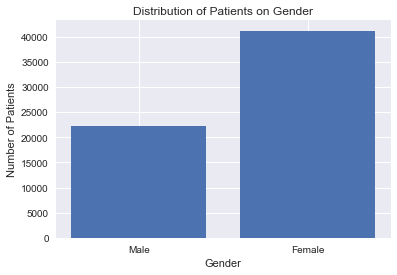

In [36]:

def count_gender(column):
    ''' Returns the number of males and females in the data'''

    count_male = 0
    count_female = 0

    for gender in column:

        if(gender == 'M'):
            count_male += 1
        elif(gender == 'F'):
            count_female += 1

    print(count_male)
    print(count_female)
    return count_male, count_female


gender_tuple = count_gender(data.loc[:, 'Gender'])

x = range(len(gender_tuple))
plt.bar(x, gender_tuple)
plt.xticks(x, ('Male', 'Female'))
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.title("Distribution of Patients on Gender")
plt.show()


The number of females in the data are more than the number of males .

In [37]:
def plot_distribution(values, ticks, title):
    '''A utility function to plot graphs'''

    x = range(len(values))
    plt.bar(x, values)
    plt.xticks(x, ticks)
    plt.title("Distribution of Patients based on {} ".format(title))
    plt.ylabel("Number of Patients")
    plt.show()

### Investigation 2 ,3 ,4

56790
6542
89.67030884860733


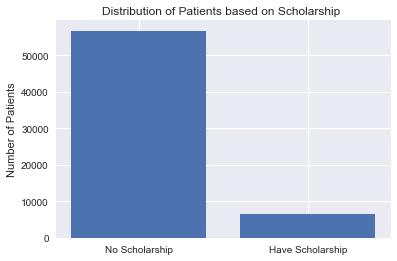

50628
12704
79.94063032905956


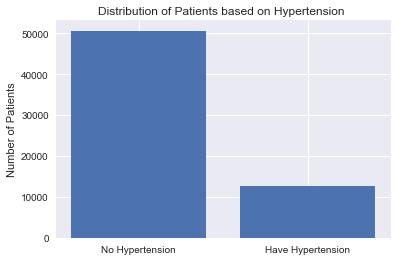

58847
4485
92.91827196362028


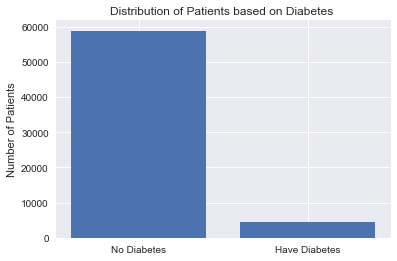

In [38]:
def count_values(column):
    '''Returns the count of zero and one'''

    count_zero = 0
    count_one = 0

    for element in column:
        if element == 0:
            count_zero += 1
        elif element == 1:
            count_one += 1

    print(count_zero)
    print(count_one)
    return count_zero, count_one


s_tuple = count_values(data.loc[:, 'Scholarship'])
print(((s_tuple[0])/(s_tuple[0]+s_tuple[1]))*100)
plot_distribution(s_tuple, ('No Scholarship',
                            'Have Scholarship'), 'Scholarship')


h_tuple = count_values(data.loc[:, 'Hipertension'])
print(((h_tuple[0])/(h_tuple[0]+h_tuple[1]))*100)
plot_distribution(h_tuple, ('No Hypertension',
                            'Have Hypertension'), 'Hypertension')

d_tuple = count_values(data.loc[:, 'Diabetes'])
print(((d_tuple[0])/(d_tuple[0]+d_tuple[1]))*100)
plot_distribution(d_tuple, ('No Diabetes', 'Have Diabetes'), 'Diabetes')


Only a small propotion of people have scholarships . 89.9% of the people do not have scholarships.
80.60 % of people do not have hypertension.
93.15 % of the people do not have diabetes.

49846
13486
78.7058674919472


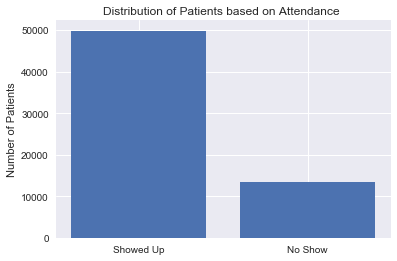

In [39]:
def count_appointments(column):
    '''Returns the number of people showing up and not showing up'''

    count_no = 0
    count_yes = 0

    for element in column:

        if element == 'No':
            count_no += 1
        elif element == 'Yes':
            count_yes += 1

    print(count_no)
    print(count_yes)
    return count_no, count_yes


no_tuple = count_appointments(data.loc[:, 'No-show'])
print(((no_tuple[0])/(no_tuple[0]+no_tuple[1]))*100)
plot_distribution(no_tuple, ('Showed Up', 'No Show'), 'Attendance')

78.76 % of the people show up for checkups .

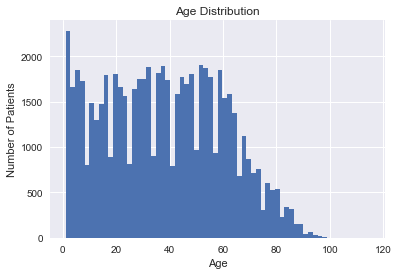

In [40]:
age_col = data.loc[:, 'Age']
plt.hist(age_col, 'auto')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution')
plt.show()

Visual distribution of age 

### Investigation 5

In [41]:
count_values(data.loc[:, 'Alcoholism'])
data['Alcoholism'].nunique()

data.groupby('Gender')['Age'].mean()

61246
2086


Gender
F    39.394546
M    34.934682
Name: Age, dtype: float64

The mean age of females is 38.40 and the mean age of males is 33.26.

In [42]:
data.groupby('Scholarship').mean()['Age']

Scholarship
0    38.632171
1    30.910272
Name: Age, dtype: float64

The mean age of people with scholarship is 30.74 and that of people without scholarship is 37.23. 

In [43]:
data.groupby('Gender').max()['Age']

Gender
F    115
M     98
Name: Age, dtype: int64

The oldest female is 115 years old and the oldest male is 98 years old.

### Investigation 6

                          Age
Gender Scholarship           
F      0            40.315375
       1            33.259397
M      0            35.760257
       1            20.101884


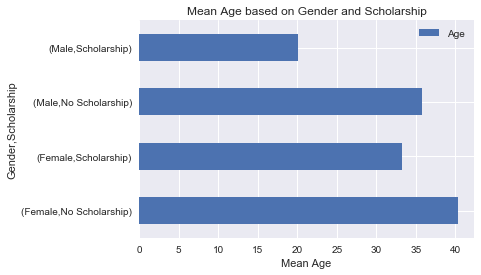

In [44]:

pivot_age_scholarship = data.pivot_table(
    values=['Age'], index=['Gender', 'Scholarship'], aggfunc=np.mean)
plt = pivot_age_scholarship.plot(
    title="Mean Age based on Gender and Scholarship", kind='barh')
plt.set_xlabel("Mean Age")
ticks = ("(Female,No Scholarship)", "(Female,Scholarship)",
         "(Male,No Scholarship)", "(Male,Scholarship)")
plt.set_yticklabels(ticks)
print(pivot_age_scholarship)


For females those with scholarships have an average age of 33.14 and those without scholarships have an average age of 39.14 . For males those with scholarships have an average age of 19.81 and those without scholarships have an average age of 33.98 

                                   Age
Gender Scholarship Diabetes           
F      0           0         38.349215
                   1         62.674845
       1           0         32.147053
                   1         52.006645
M      0           0         34.130102
                   1         61.236926
       1           0         19.260526
                   1         54.357143


[Text(0,0,'(Female, No Scholarship, No Diabetes)'),
 Text(0,0,'(Female, No Scholarship, Diabetes)'),
 Text(0,0,'(Female, Scholarship, No Diabetes)'),
 Text(0,0,'(Female, Scholarship, Diabetes)'),
 Text(0,0,'(Male, No Scholarship, No Diabetes)'),
 Text(0,0,'(Male, No Scholarship, Diabetes)'),
 Text(0,0,'(Male, Scholarship, No Diabetes)'),
 Text(0,0,'(Male, Scholarship, Diabetes)')]

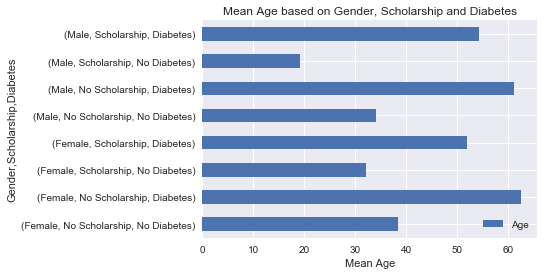

In [45]:
pivot_a_s_d = data.pivot_table(
    values=['Age'], index=['Gender', 'Scholarship', 'Diabetes'], aggfunc=np.mean)

print(pivot_a_s_d)
plt = pivot_a_s_d.plot(
    kind='barh', title="Mean Age based on Gender, Scholarship and Diabetes")
plt.set_xlabel("Mean Age")
ticks = ("(Female, No Scholarship, No Diabetes)", "(Female, No Scholarship, Diabetes)", "(Female, Scholarship, No Diabetes)",
         "(Female, Scholarship, Diabetes)", "(Male, No Scholarship, No Diabetes)", "(Male, No Scholarship, Diabetes)",
         "(Male, Scholarship, No Diabetes)", "(Male, Scholarship, Diabetes)")
plt.set_yticklabels(ticks)


### Investigation 7

                             Age
Hipertension Diabetes           
0            0         31.852862
             1         52.757463
1            0         59.100188
             1         63.412388


[Text(0,0,'(No Hypertension, No Diabetes)'),
 Text(0,0,'(No Hypertension, Diabetes)'),
 Text(0,0,'(Hypertension, No Diabetes)'),
 Text(0,0,'(Hypertension, Diabetes)')]

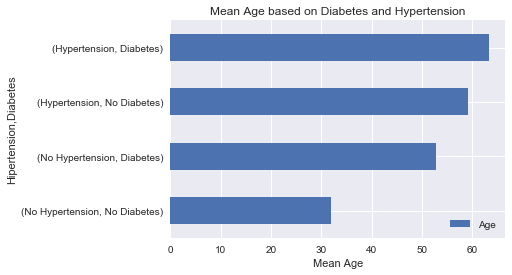

In [46]:
pivot_a_h_d = data.pivot_table(
    values=['Age'], index=['Hipertension', 'Diabetes'], aggfunc=np.mean)
print(pivot_a_h_d)
plt = pivot_a_h_d.plot(
    kind='barh', title="Mean Age based on Diabetes and Hypertension")
plt.set_xlabel("Mean Age")
ticks = ("(No Hypertension, No Diabetes)", "(No Hypertension, Diabetes)", "(Hypertension, No Diabetes)",
         "(Hypertension, Diabetes)")
plt.set_yticklabels(ticks)


The average age of people who do not have hypertension and diabetes is 30.52.
The average age of people who do not have hypertension but have diabetes is 52.75 .
The average age of people who have hypertension and do not have diabetes is 59.10.
The average age of people who have hypertension and diabetes is 63.41.

## Conclusion

There are a large number of females in the data compared to the males. Only a small propotion of the people in the data have scholarships.It is also observed that only few have hypertension and diabetes.Males and females with no scholarships have a larger mean age compared to their counterparts with scholarships.People with both diabetes and hypertension have a higher mean age.
I wish there was data about more diseases. 

#### Limitations 
The analysis is limited to the sample only . It is also not known if data is a random sample .